https://www.udemy.com/course/logistic-regression-cancer-detection-case-study/learn/lecture/18888180#overview

Database site = https://archive.ics.uci.edu/ml/index.php

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv("breast_cancer.csv")
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


(2 for benign, 4 for malignant)

In [3]:
dataset.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [4]:
dataset.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [5]:
dataset.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
dataset["Class"].value_counts()

2    444
4    239
Name: Class, dtype: int64

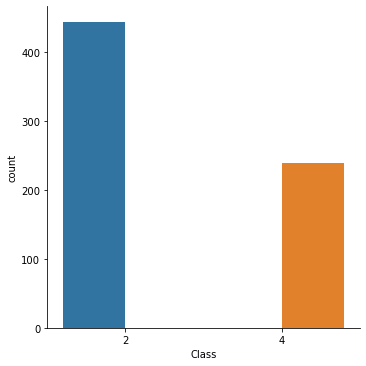

In [7]:
import seaborn as sns
sns.catplot(x="Class", kind="count", hue="Class", data=dataset)

<AxesSubplot:>

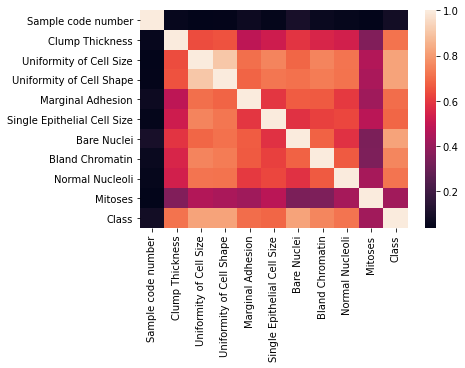

In [8]:
corr=dataset.corr()
sns.heatmap(corr.abs())

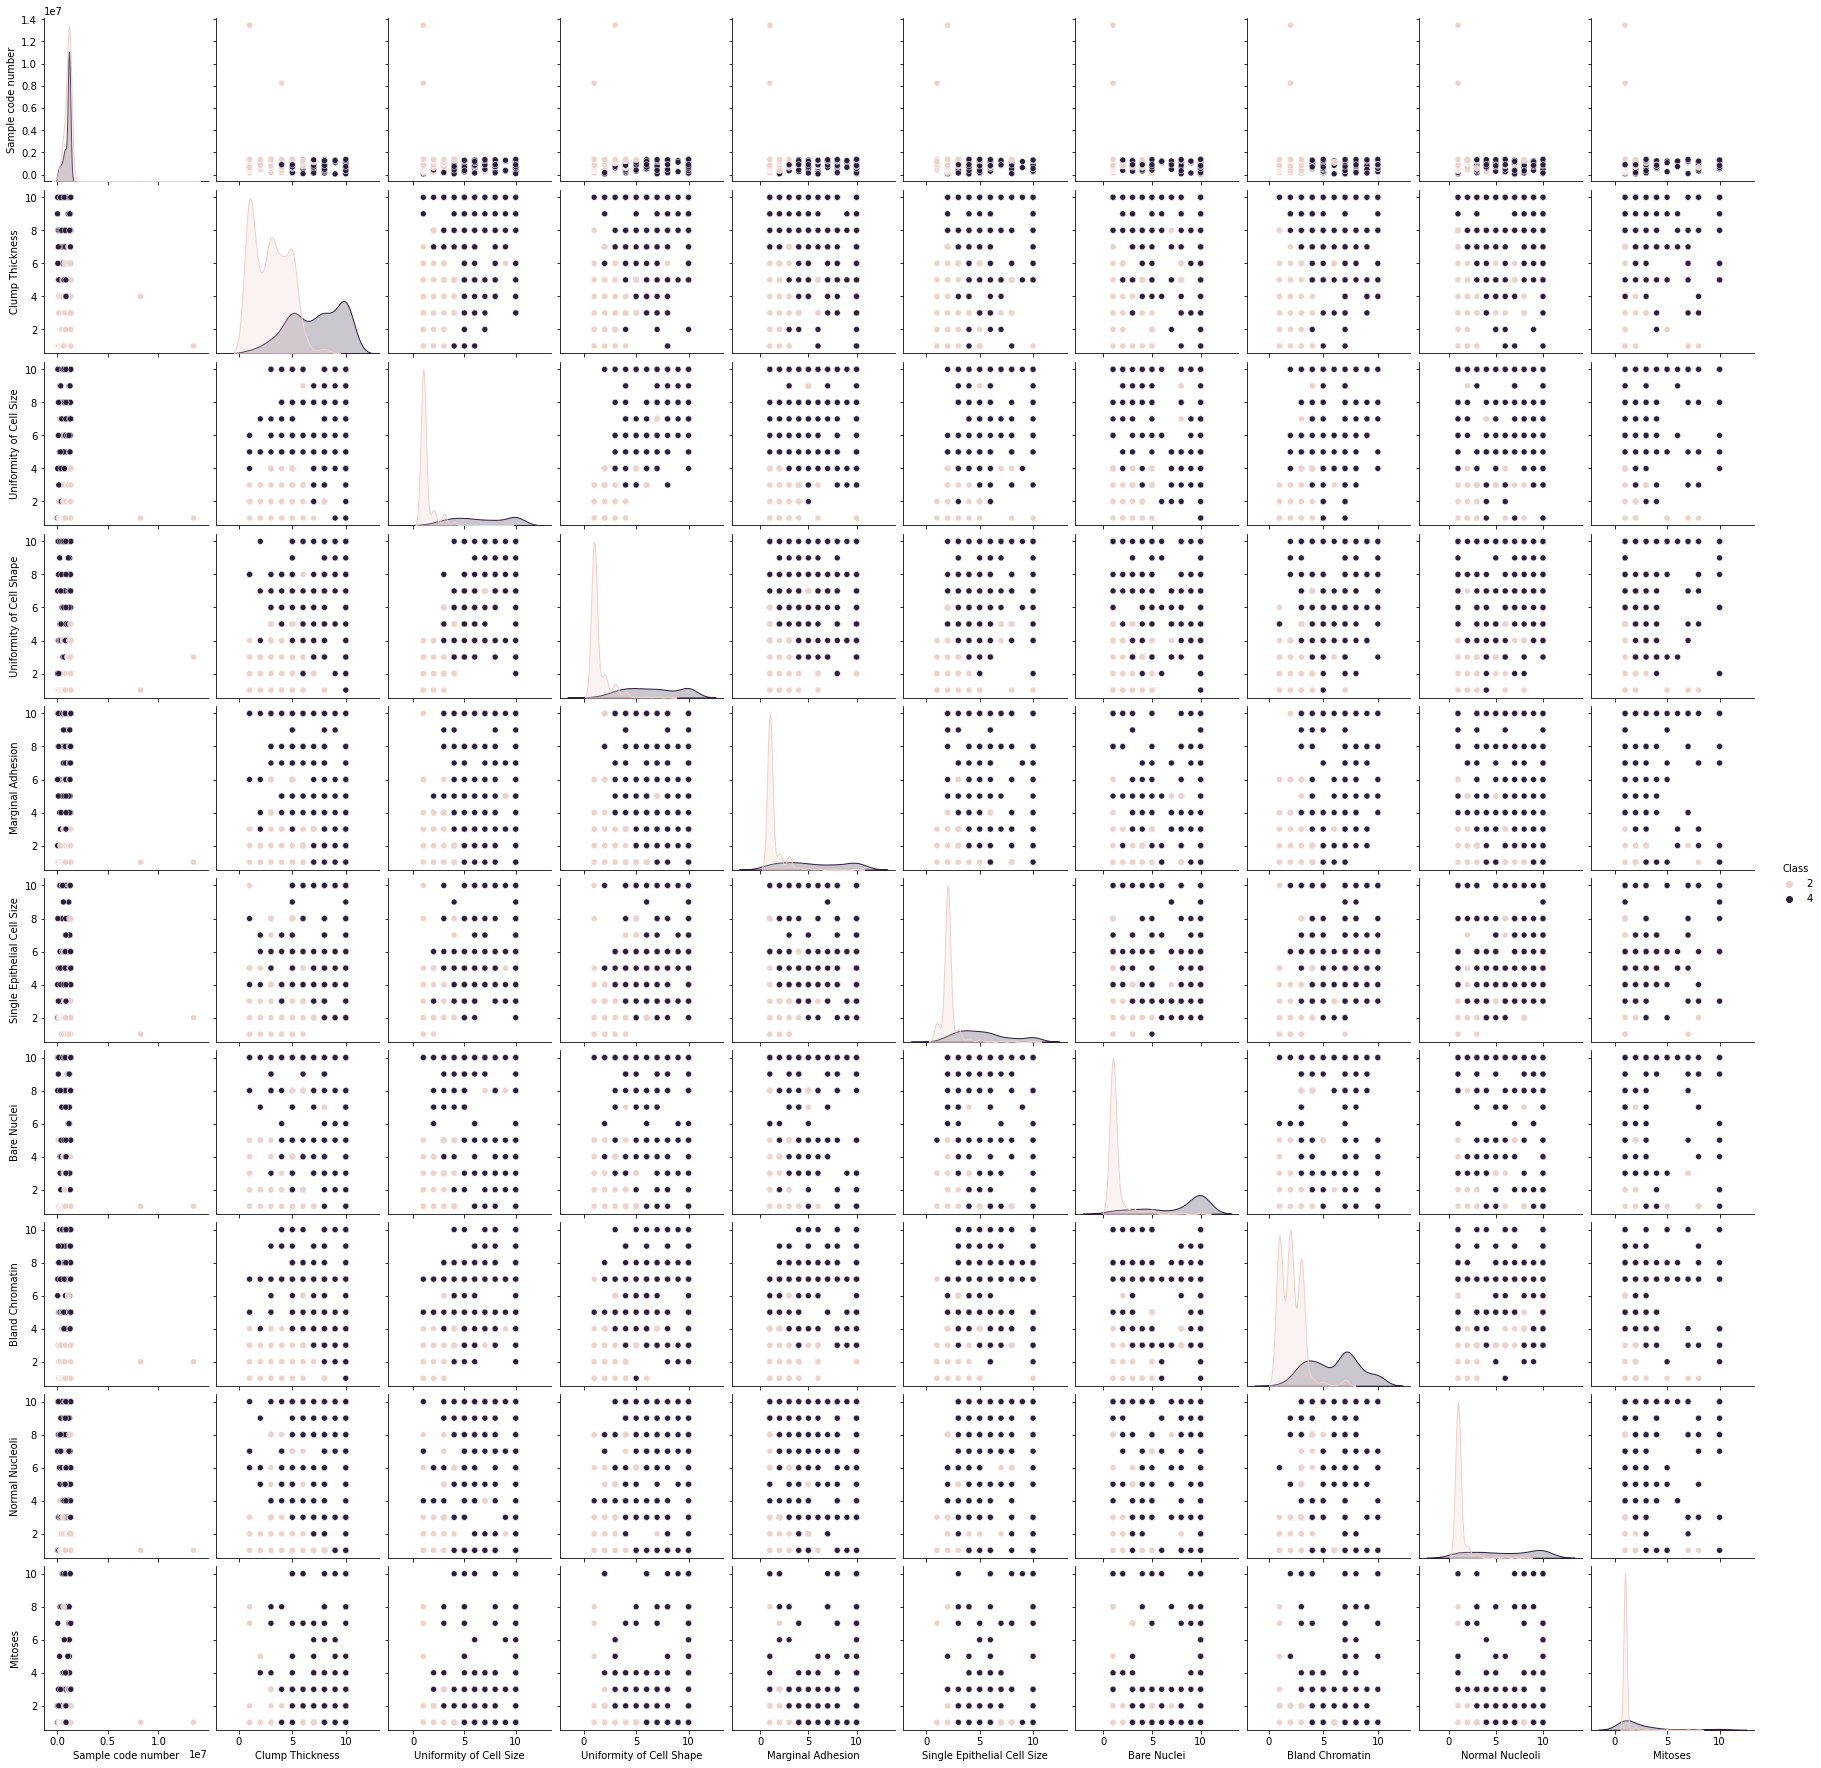

In [9]:
sns.pairplot(dataset, hue="Class")

In [10]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [13]:
y_train.value_counts()/y_train.count()

2    0.660832
4    0.339168
Name: Class, dtype: float64

In [14]:
y_test.value_counts()/y_test.count()

2    0.628319
4    0.371681
Name: Class, dtype: float64

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
y_test.value_counts()

2    142
4     84
Name: Class, dtype: int64

In [18]:
y_pred=pd.Series(y_pred)
y_pred.value_counts()

2    144
4     82
dtype: int64

In [19]:
y_test=y_test.replace({2:0, 4:1})
y_pred=y_pred.replace({2:0, 4:1})

<AxesSubplot:>

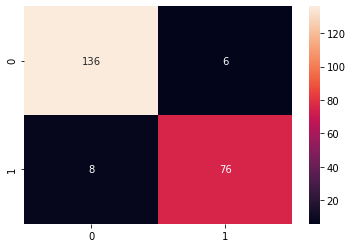

In [20]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='g')

<AxesSubplot:>

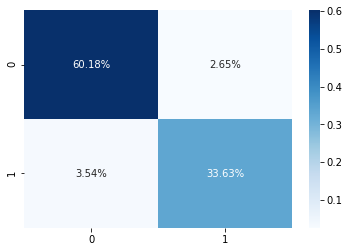

In [21]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [22]:
# quantos eles acertou sendo pos e neg juntos
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9380530973451328

In [23]:
# quantos eles acertou do predição positiva, ou seja quando que ele disse que era da classe positiva, realmente era da classe positiva ?
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.926829268292683

In [24]:
# quantos da classe positiva ele conseguiu recuperar?
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.9047619047619048

In [25]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9156626506024096

In [26]:
from pycm import *
cm = ConfusionMatrix(y_test.values, y_pred.values,digit=5)
cm.class_stat

{'TPR': {0: 0.9577464788732394, 1: 0.9047619047619048},
 'TNR': {0: 0.9047619047619048, 1: 0.9577464788732394},
 'PPV': {0: 0.9444444444444444, 1: 0.926829268292683},
 'NPV': {0: 0.926829268292683, 1: 0.9444444444444444},
 'FNR': {0: 0.04225352112676062, 1: 0.09523809523809523},
 'FPR': {0: 0.09523809523809523, 1: 0.04225352112676062},
 'FDR': {0: 0.05555555555555558, 1: 0.07317073170731703},
 'FOR': {0: 0.07317073170731703, 1: 0.05555555555555558},
 'ACC': {0: 0.9380530973451328, 1: 0.9380530973451328},
 'F1': {0: 0.951048951048951, 1: 0.9156626506024096},
 'MCC': {0: 0.8668799695901912, 1: 0.8668799695901912},
 'BM': {0: 0.8625083836351441, 1: 0.8625083836351441},
 'MK': {0: 0.8712737127371275, 1: 0.8712737127371275},
 'PLR': {0: 10.056338028169014, 1: 21.412698412698386},
 'NLR': {0: 0.04670126019273542, 1: 0.09943977591036414},
 'DOR': {0: 215.33333333333306, 1: 215.3333333333331},
 'TP': {0: 136, 1: 76},
 'TN': {0: 76, 1: 136},
 'FP': {0: 8, 1: 6},
 'FN': {0: 6, 1: 8},
 'POP': {0:

In [33]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X= X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.14 %
Standard Deviation: 2.21 %
